In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate Sample Data

In [2]:
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X**3 - 2 * X**2 + 5 * X + np.random.normal(0, 10, size=X.shape)

### Convert to Polynomial Features

In [3]:
from sklearn.preprocessing import PolynomialFeatures

degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

### Train Model

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

### Evaluate Model

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Coefficients: [[ 0.         -0.10227755 -1.57623479  3.00628231]]
Intercept: [10.32617865]
MAE: 7.33, MSE: 85.31, RMSE: 9.24, R2: 1.00


### Plot Results

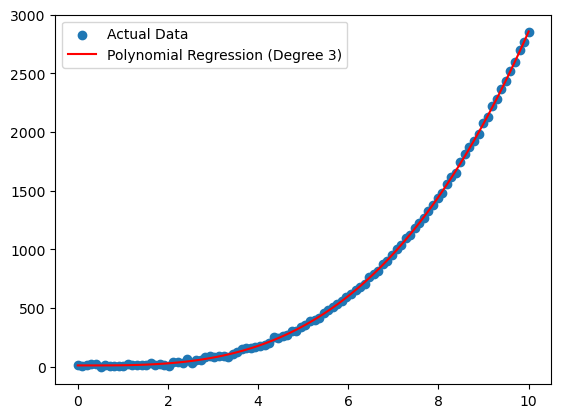

In [6]:
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.show()

### Train Ridge Regression Model

In [7]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)  # α (lambda) controls regularization strength
ridge_model.fit(X_poly, y)
y_ridge_pred = ridge_model.predict(X_poly)

### Train Lasso Regression Model

In [8]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  # α (lambda) controls regularization strength
lasso_model.fit(X_poly, y)
y_lasso_pred = lasso_model.predict(X_poly)

### Train Elastic Net Model

In [9]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio balances Lasso & Ridge
elastic_model.fit(X_poly, y)
y_elastic_pred = elastic_model.predict(X_poly)

### Visualizing the Effect of Regularization

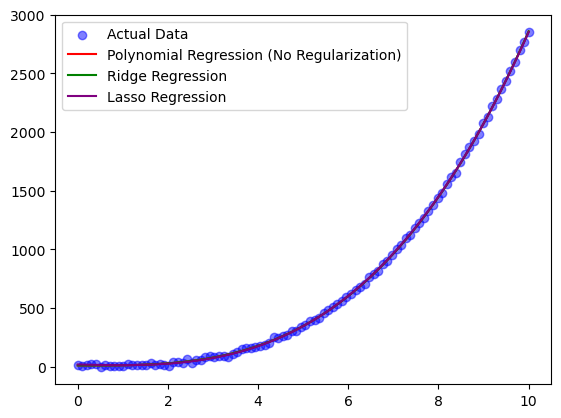

In [10]:
plt.scatter(X, y, label="Actual Data", color='blue', alpha=0.5)
plt.plot(X, y_pred, label="Polynomial Regression (No Regularization)", color='red')
plt.plot(X, y_ridge_pred, label="Ridge Regression", color='green')
plt.plot(X, y_lasso_pred, label="Lasso Regression", color='purple')
plt.legend()
plt.show()